# Breast cancer detection from thermal imaging

The main purpose of this project is to develop a comprehensive decision support system for breast cancer screening.

## Library import
En esta sección se tratará de importar las librerias que se van a utilizar a lo largo de este modelo. Hay que tener en cuenta que parte de las librerías que utiliza este programa se encuentran declaradas en los ficheros que se encuentran en `src/scripts/*.py`.

In [96]:
%reload_ext autoreload
%autoreload 2

In [97]:
from scripts import *

In [98]:
computer.check_available_devices() # Check available devices

Available devices:
- CPU: /physical_device:CPU:0
- GPU: /physical_device:GPU:0


## Data selection
To make this model work correctly it will be necessary to extract and save the images found in the `data` folder.

In this folder there are two labeled folders that contain all the images to be used:
```
data
├── healthy
└── sick
```

In [99]:
data = Data("./data/") # Data imported into a table

data.images.head(3) # Display first 3 rows

,image,category
0,./data/healthy/16-TFRON_V16_31-10-2012_8.jpg,0
1,./data/healthy/169-TFRON_V173_8-4-2013_0.jpg,0
2,./data/healthy/17-TFRON_V17_31-10-2012_6.jpg,0


## Transformation
In the transformation stage, the data is adapted to find the solution to the problem to be solved.

First of all, the data obtained previously will be divided to be able to use it for training and to check the results.

In [100]:
data.training, data.test = data.train_test_split(test_size=0.15, shuffle=True, stratify=True) # Split data into train and test

In [101]:
# The category distribution is shown for the original, training, and test data
data.count_labels(data.images, "Original")
data.count_labels(data.training, "Training")
data.count_labels(data.test, "Test")

Original: [99 96] [0.51 0.49]
Training: [84 81] [0.51 0.49]
Test: [15 15] [0.5 0.5]


Once the data is divided, different transformation techniques are applied on it to expand the size of the dataset in real time while training the model.

In [102]:
traing_generator, validation_generator, test_generator = data.image_generator() # Image genearation

Found 132 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.
Found 30 validated image filenames belonging to 2 classes.


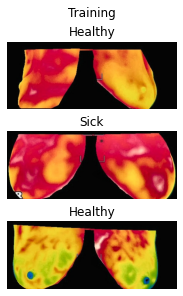

In [103]:
data.show_images(traing_generator, "Training") # Show some images from the training generator